# 2

We have from 1.6.8 that

$$ r \approx \frac{c}{a_0H_0} \left[ z - \frac{1}{2}(1+q_0)z^2 \right] $$

If $ a/a_0 = (t/t_0)^n $, we have

$$ a_0 = 1$$
$$ \dot{a} = na_0\left(\frac{t}{t_0}\right)^{n-1}$$
$$ \ddot{a} = na_0(n-1)\left(\frac{t}{t_0}\right)^{n-2}$$

$$ \begin{align}
q_0 &= -\frac{\ddot{a_0}a_0}{\dot{a_0}^2} \\ 
&= \frac{(1-n)}{n}(t/t0)^{-n} \\ 
&=\frac{(1-n)}{n}(1+z) 
\end{align}
$$

Substitution immediately recovers the results from the problem statement.

# 3

In [11]:
import numpy as np

def dphi(z,c,b,H0,Wm,Wl):
    
    n = 1000
    zz = np.linspace(0,z,n)
    df = (1.0 / n) / np.sqrt( Wm*(1+zz)**3 + Wl )
    ii = np.sum(df)
    
    return (1+z)*H0 / (c*ii)

In [12]:
%pylab
%matplotlib inline
c = 9.716e-6 # Mpc per second
H0 = 2e-18 # inverse seconds 
b = 1 # Mpc

z = np.linspace(0.5,3,100)

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


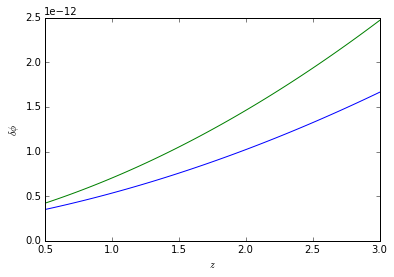

In [13]:
ylabel("$\delta\phi$")
xlabel("$z$")

# blue curve

Wm = 0.3
Wl = 0.7

plot( z, [dphi(zz,c,b,H0,Wm,Wl) for zz in z] ) 

# green curve

Wm = 1.0
Wl = 0

plot( z, [dphi(zz,c,b,H0,Wm,Wl) for zz in z] ) 

# 4

Consider the Friedmann equation,

$$ \frac{\dot{a}^2 + kc^2}{a^2} = \frac{8\pi\rho + \Lambda c^2}{3} $$

For a flat, empty, $\Lambda$-free universe, we can see immediately that $\dot{a} = 0$ so that $a$ is constant. The flat FLRW metric is now trivially the Minkowski metric, with a rescaling of the distance unit that can be taken to be unity without loss of generality.


# 5

Since we're given all the components of $\Omega_0$, we know the value of the Hubble parameter at every scale factor:

$$ H^2 = H_0^2 \left[ \Omega_{0m}\left(\frac{a_0}{a}\right) + \Omega_{0r}\left(\frac{a_0}{a}\right)^2  + \Omega_{0\Lambda}\left(\frac{a_0}{a}\right)^{-2} + (1-\Omega_{0m}-\Omega_{0r}-\Omega_{0\Lambda})\right] $$

which we can numerically integrate to find the scale factor at every point in time.

In [60]:
# our expression for da/dt
def get_adot(a,adot0,a0,Wm,Wr,Wl):
    a0a = a0/a
    a0a2 = a0a*a0a
    return adot0*np.sqrt(( Wm*(a0a) + Wr*(a0a2) + Wl/(a0a2) + (1-Wm-Wr-Wl) ))

# Adopt units where c= a0 = 1

c = 1.0
a0 = 1.0
adot0 = 0.7
t0 = 1/adot0
Wl = 0.7
Wm = 0.3
Wr = 0

# Use a simple implicit euler stepper to integrate

a = [a0]
adot = [adot0]

n = 1000000
t = np.linspace(t0,0.09,n)
dt = t[1] - t[0]

for i in range(n):
    
    _adot = get_adot(a[i], adot0, a0, Wm, Wr, Wl)
    _a = a[i] + (_adot * dt)
    
    a.append(_a)
    adot.append(_adot)

a = np.array(a)
adot = np.array(adot)
z = -1 + 1/a

We can also find $\ddot{a}$, leaving out the $\Omega_{0r}$ term we aren't using:

$$ \dot{a}^2 = \dot{a}_0^2 \left[ \Omega_{0m}\left(\frac{a_0}{a}\right) + \Omega_{0r}\left(\frac{a_0}{a}\right)^2  + \Omega_{0\Lambda}\left(\frac{a_0}{a}\right)^{-2} + (1-\Omega_{0m}-\Omega_{0r}-\Omega_{0\Lambda})\right] $$

$$ \implies \ddot{a} = \frac{\dot{a}_0^2}{2\dot{a}}\left[ -\Omega_{0m}a_0\dot{a}a^{-2} + 2\Omega_{0\Lambda}a_0^{-2}\dot{a}a \right] $$




In [61]:
adotdot = 0.5*adot0*adot0 * (2.0*Wl*a/(adot0*adot0) - Wm/(a*a) )

We now know more or less everything there is to know about this cosmology out to a redshift of about 11.6, and can go crazy calculating quantities.

In [81]:
q = -adotdot*a/(adot*adot)

Rc = c * a / adot

# We aren't able to integrate back all the way to t=0 with this method, so values should be taken with a grain of salt
RH = (a[::-1] * np.cumsum(dt*c/a[::-1]))[::-1]


Finally, plot everything as a function of z

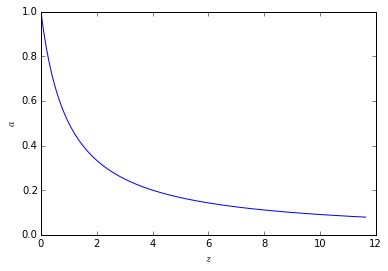

In [82]:
plot(z,a)
ylabel("$a$")
xlabel("$z$")

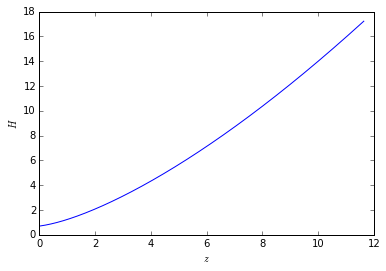

In [83]:
plot(z,adot/a)
ylabel("$H$")
xlabel("$z$")

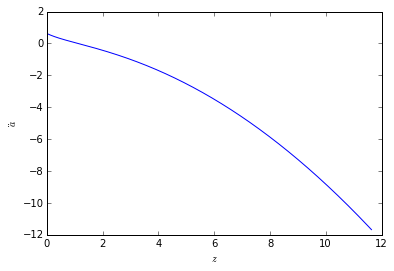

In [84]:
plot(z,adotdot)
ylabel("$\ddot{a}$")
xlabel("$z$")

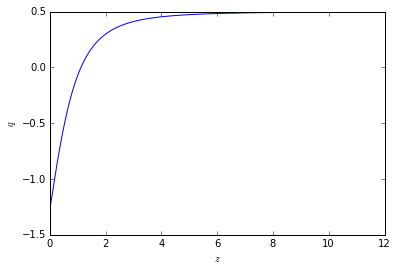

In [85]:
plot(z,q)
ylabel("$q$")
xlabel("$z$")

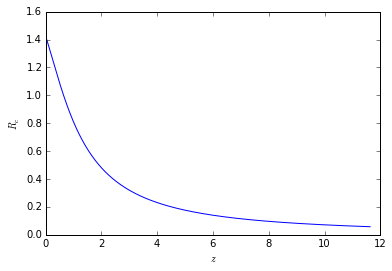

In [86]:
plot(z,Rc)
ylabel("$R_c$")
xlabel("$z$")

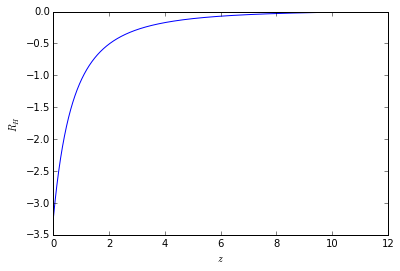

In [87]:
plot(z,RH)
ylabel("$R_H$")
xlabel("$z$")

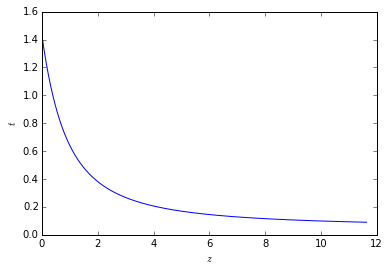

In [88]:
plot(z[:-1],t)
ylabel("$t$")
xlabel("$z$")